In [110]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = pd.read_csv('pre_data/test_model.csv')
datasets.head()

,id,area_v2,width,area,longitude,region,property_back_condition,shop_alias,unitnumber,furnishing_sell,...,rooms,project_oid,category,shop,price,latitude,house_type,street_id,ward,floors
0,61021596,12121,NaN,121,105.47380,12,1.0,NaN,HAI0912533345,3.0,...,3,NaN,1020,NaN,1770000000,21.16054,3,2331.0,203.0,3.0
1,61147191,12081,5.0,81,105.88171,12,1.0,NaN,HAI0912533345,3.0,...,3,NaN,1020,NaN,1740000000,20.84320,3,0.0,54.0,3.0
2,76338079,12086,4.0,86,105.74743,12,1.0,NaN,NaN,3.0,...,3,NaN,1020,NaN,1400000000,20.97548,3,1937.0,272.0,3.0
3,83122704,12086,5.0,86,105.73317,12,1.0,NaN,NaN,3.0,...,3,NaN,1020,NaN,1760000000,20.95799,3,0.0,268.0,3.0
4,83640913,12076,4.2,76,105.85366,12,NaN,BtqRpSXym8DHeSJ,NaN,3.0,...,5,NaN,1020,"{'alias': 'BtqRpSXym8DHeSJ', 'status': 'accept...",43000000000,21.01610,1,580.0,88.0,8.0


In [111]:
datasets = datasets.dropna(subset=['size', 'house_type', 'rooms', 'street_id', 'ward'])
datasets.drop(['body', 'category', 'region_v2', 'subject', 'area', 'region', 'direction',
                'shop', 'block', 'projectid', 'shop_alias','unitnumber', 'project_oid', 'street_number'], axis=1, inplace=True)

In [112]:
import plotly.express as px

fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [113]:
datasets.drop(datasets[datasets.floors > 20].index, inplace=True)

In [114]:
px.scatter(y=datasets['floors'], x = datasets['rooms'])

In [115]:
import numpy as np

datasets.query('rooms == 1 and floors >= 1')[['floors', 'rooms']].groupby("floors").count()

,rooms
floors,
1.0,34
2.0,13
3.0,3
4.0,2
5.0,3


In [116]:
datasets.drop(datasets.query('rooms == 1 and floors > 3').index, inplace=True)

In [117]:
datasets.query('rooms == 2 and floors >= 1')[['floors', 'rooms']].groupby("floors").count()

,rooms
floors,
1.0,25
2.0,63
3.0,63
4.0,54
5.0,15
6.0,3
7.0,4
8.0,2
9.0,1


In [118]:
datasets.drop(datasets.query('rooms == 2 and floors > 5').index, inplace=True)

In [119]:
datasets.query('rooms == 6 and floors >= 1')[['floors', 'rooms']].groupby("floors").count()

,rooms
floors,
1.0,1
2.0,1
4.0,22
5.0,210
6.0,40
7.0,12
8.0,2


In [120]:
datasets.drop(datasets.query('rooms == 6 and floors < 3').index, inplace=True)

In [251]:
px.scatter(y=datasets['floors'], x = datasets['rooms'])

In [122]:
datasets[['rooms', 'toilets']]

,rooms,toilets
0,3,2.0
1,3,2.0
2,3,2.0
3,3,2.0
4,5,7.0
...,...,...
5540,3,2.0
5541,4,3.0
5542,4,4.0
5543,4,NaN


In [123]:
datasets.query('rooms < 6 and toilets == 7')[['toilets', 'rooms']].groupby("rooms").count()

,toilets
rooms,
2,1
3,3
4,1
5,6


In [124]:
datasets.drop(datasets.query('rooms < 6 and toilets == 7').index, inplace=True)

In [125]:
datasets.query('rooms == 3 and toilets >= 1')[['toilets', 'rooms']].groupby("toilets").count()

,rooms
toilets,
1.0,9
2.0,159
3.0,765
4.0,601
5.0,29
6.0,5


In [126]:
datasets.drop(datasets.query('rooms == 3 and toilets > 5').index, inplace=True)

In [252]:
px.scatter(y=datasets['toilets'], x = datasets['rooms'])

In [128]:
import plotly.express as px

fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

<function matplotlib.pyplot.show(close=None, block=None)>

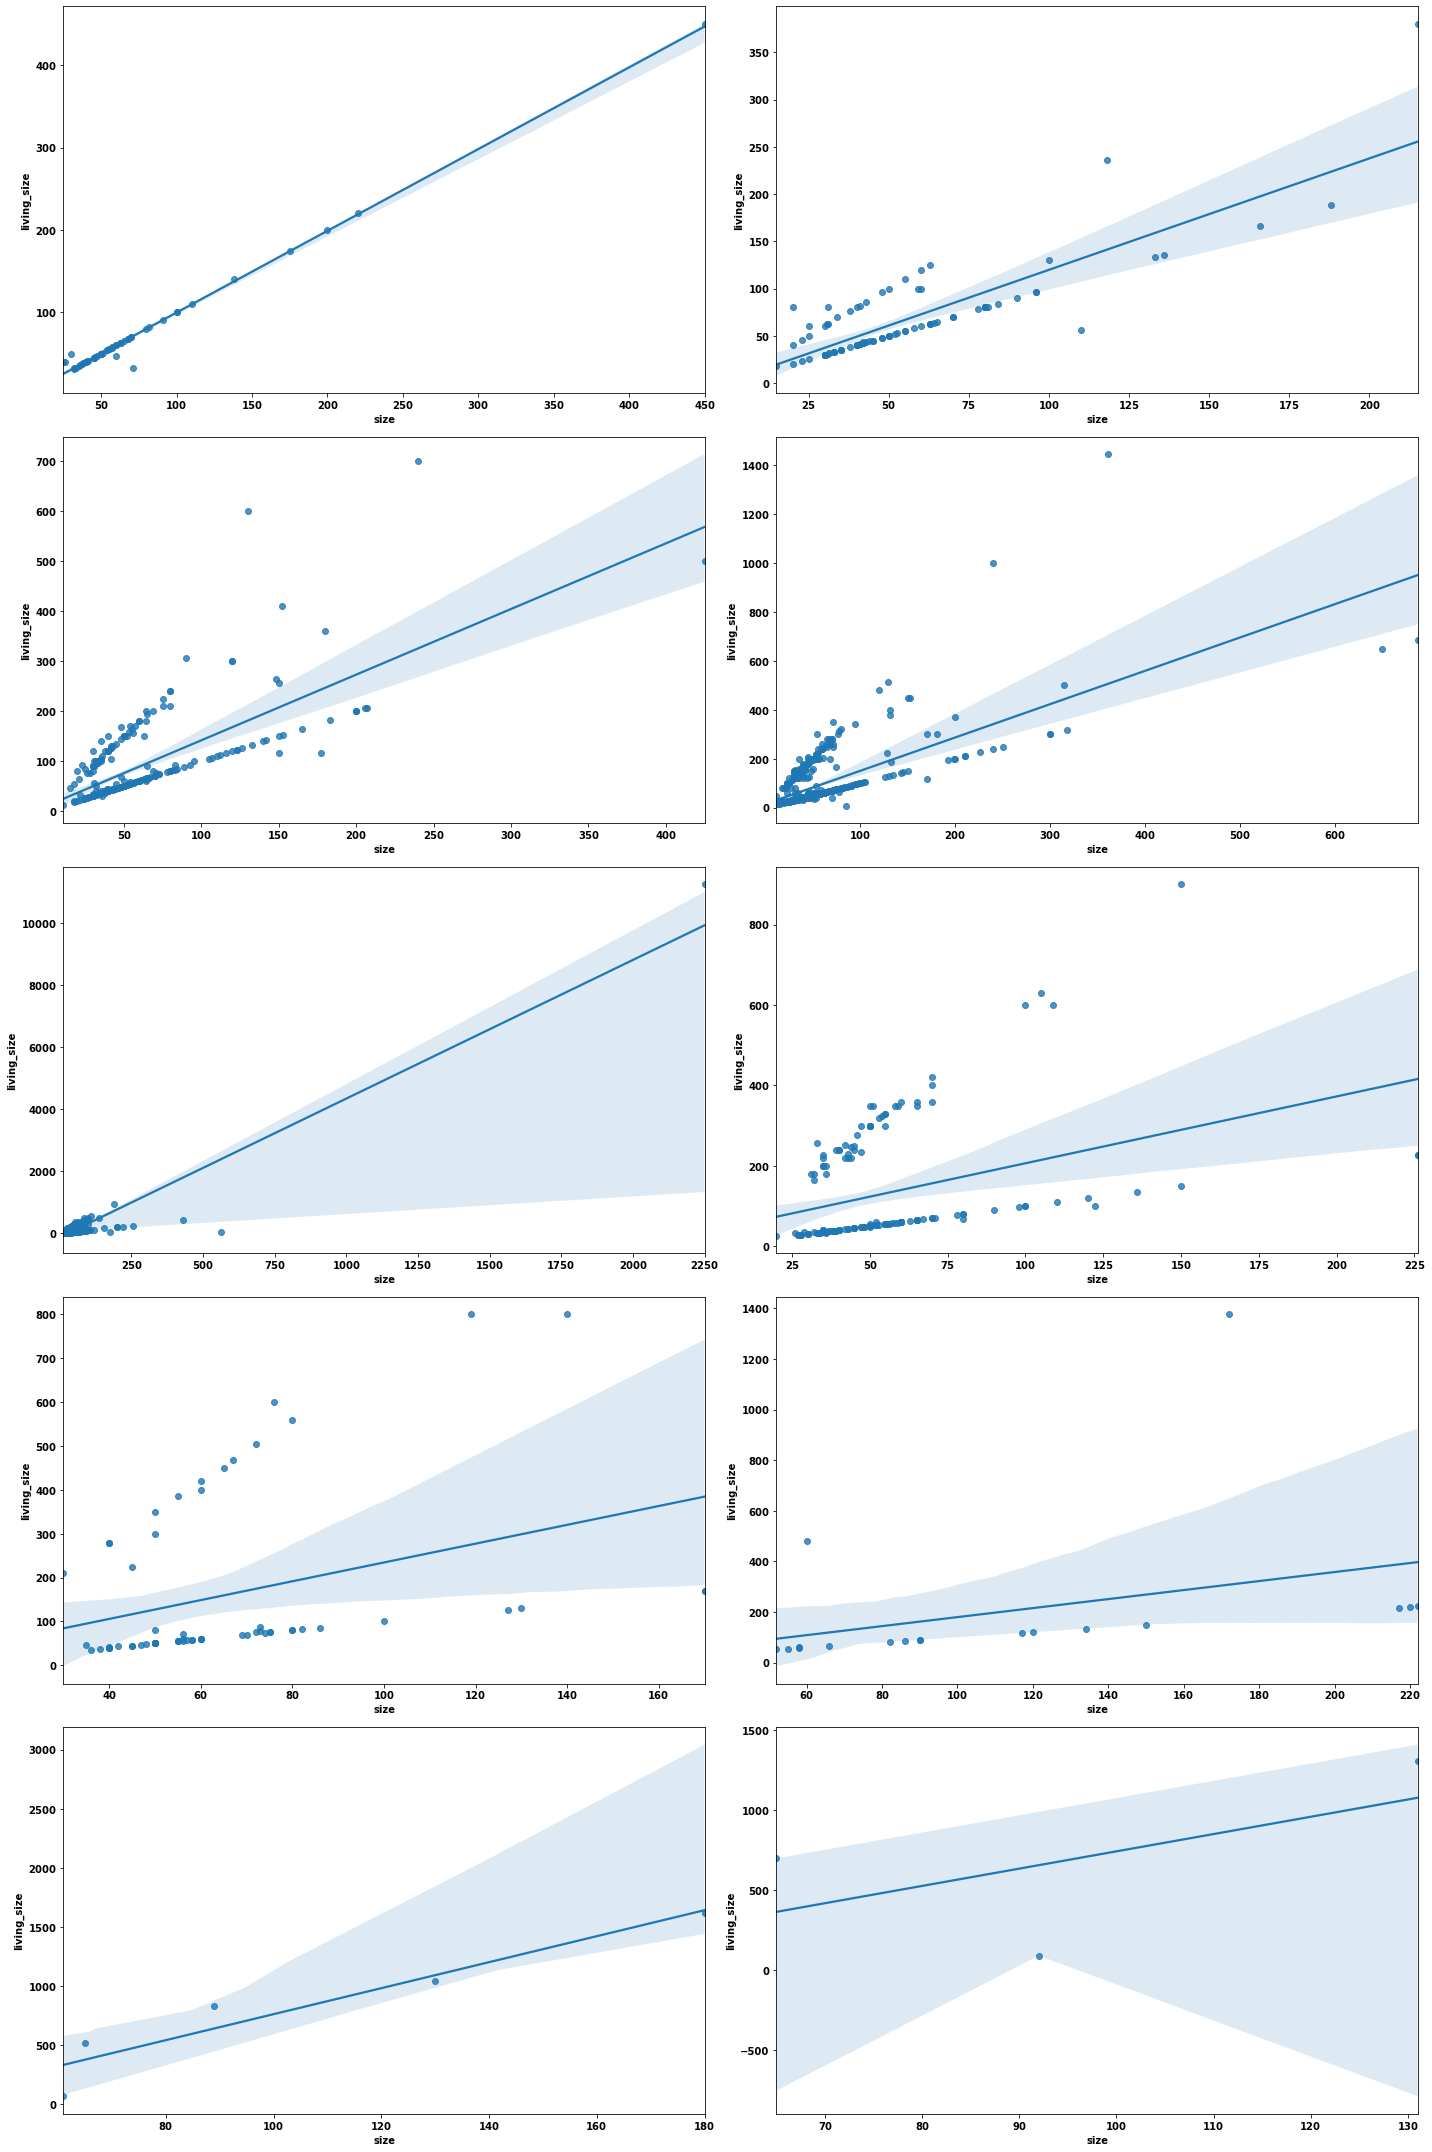

In [145]:
import seaborn as sns

fig = plt.figure(figsize = (20,30))
for i in range(1, 11):
    fig.add_subplot(5, 2, i)
    inp = datasets.query('floors == ' + str(i))[['size', 'living_size']]
    sns.regplot(x=inp['size'], y=inp['living_size'])
plt.tight_layout()
plt.show


In [146]:
for i in range(1, 11):
    inp = datasets.query('floors == ' + str(i))[['size', 'living_size']]
    fig = px.scatter(x=inp['size'], y=inp['living_size'])
    fig.update_layout(title = i)
    fig.show()

In [147]:
datasets.drop(['living_size'], axis=1, inplace=True)

In [148]:
fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [158]:
datasets['width'].unique()

array([     nan, 5.00e+00, 4.00e+00, 1.80e+01, 3.00e+00, 4.20e+00,
       8.00e+00, 4.40e+00, 1.00e+01, 3.50e+00, 3.30e+01, 3.60e+00,
       6.00e+00, 3.80e+00, 3.20e+00, 7.00e+00, 3.70e+00, 4.50e+00,
       3.60e+01, 1.20e+01, 9.00e+00, 6.80e+00, 3.90e+00, 3.30e+00,
       6.50e+01, 9.30e+00, 1.10e+01, 1.50e+01, 3.00e+01, 3.75e+00,
       4.50e+01, 3.67e+00, 3.40e+01, 5.60e+00, 4.30e+00, 2.00e+00,
       3.40e+00, 4.80e+00, 4.60e+01, 6.50e+00, 3.55e+00, 3.70e+03,
       5.80e+01, 3.10e+00, 4.70e+00, 4.96e+00, 8.50e+00, 2.60e+01,
       5.20e+00, 4.10e+00, 5.50e+01, 2.00e+01, 4.10e+01, 3.90e+01,
       6.40e+00, 3.50e+01, 5.50e+00, 3.70e+01, 2.70e+00, 5.30e+00,
       2.40e+00, 6.30e+00, 5.40e+00, 6.20e+01, 4.60e+00, 4.29e+00,
       1.70e+01, 3.80e+01, 8.30e+00, 6.30e+01, 1.47e+01, 4.62e+00,
       7.80e+00, 5.80e+00, 3.68e+00, 2.50e+01, 5.20e+01, 1.60e+01,
       4.73e+00, 4.65e+00, 4.20e+01, 5.23e+02, 2.50e+00, 7.50e+00,
       8.20e+00, 4.85e+00, 2.20e+01, 7.30e+01, 7.70e+00, 1.40e

D:\Users\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='width', ylabel='Density'>

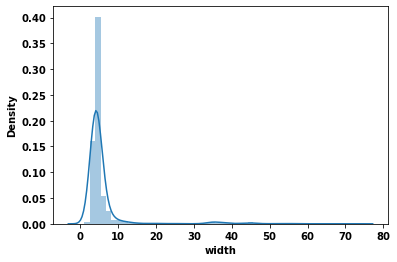

In [247]:
sns.distplot(datasets[datasets.width < 100]['width'])

D:\Users\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='length', ylabel='Density'>

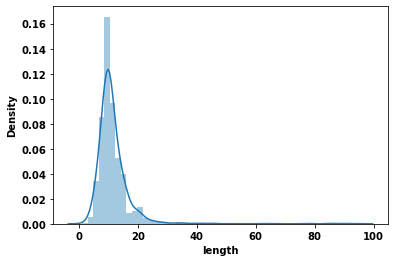

In [166]:
sns.distplot(datasets[datasets.length < 100]['length'])

In [152]:
datasets.isnull().query('length == True and width == True')

,id,area_v2,width,longitude,property_back_condition,furnishing_sell,size,property_road_condition,toilets,property_legal_document,list_time,length,rooms,price,latitude,house_type,street_id,ward,floors
0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
15,False,False,True,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
21,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
26,False,False,True,True,True,True,False,True,False,False,False,True,False,False,True,False,False,False,True
37,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False
5530,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
5533,False,False,True,False,True,True,False,True,True,False,False,True,False,False,False,False,False,False,True
5534,False,False,True,False,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False


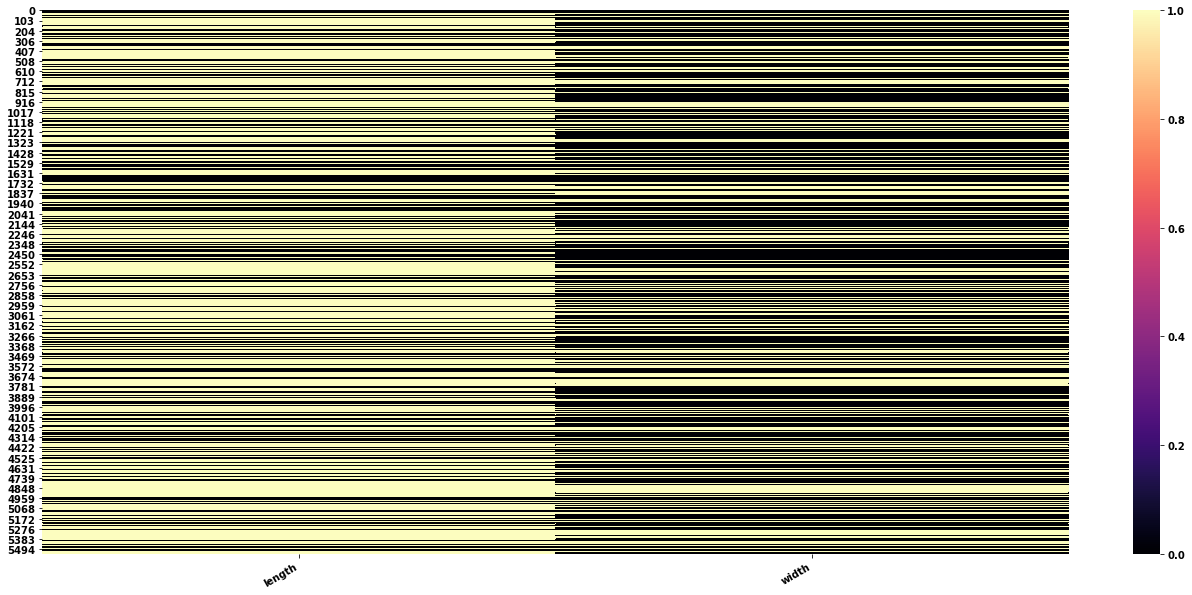

In [150]:
plt.figure(figsize=(23,10))
sns.heatmap(datasets[['lengyh', 'width']].isnull(), cbar=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.show()

In [172]:
datasets[['id', 'width']].groupby("width").count()

,id
width,
1.00,2
2.00,10
2.04,1
2.40,1
2.50,1
...,...
3250.00,1
3500.00,1
3600.00,1


In [175]:
inp = datasets[['id', 'width']].groupby(["width"]).count()
fig = px.bar(data_frame=inp, text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [189]:
inp[inp.id < 10]['id'].sum()

248

In [240]:
inp[inp.id < 10].iloc[1, 0]

1

In [243]:
s = 0
for i in range(len(inp[inp.id < 10])):
    if inp[inp.id < 10].index[i] > 20:
        s += inp[inp.id < 10].iloc[i, 0]

In [248]:
datasets['property_back_condition'].fillna(value=0, inplace=True)
datasets['property_legal_document'].fillna(value=0, inplace=True)
datasets['property_road_condition'].fillna(value=0, inplace=True)
datasets['furnishing_sell'].fillna(value=0, inplace=True)

In [250]:
datasets.drop(['latitude', 'longitude', 'width', 'length'], axis=1, inplace=True)

In [297]:
toilet_dict = {}
floor_dict = {}
for i in range(1, 12):
    toilet_dict[i] = datasets[datasets.rooms == i]['toilets'].mean()
    floor_dict[i] =  datasets[datasets.rooms == i]['floors'].mean()

datasets['toilets'] = datasets['toilets'].fillna(datasets['rooms'].map(toilet_dict))
datasets['floors'] = datasets['floors'].fillna(datasets['rooms'].map(floor_dict))


In [298]:
fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [299]:
datasets.list_time

0       22 November 2021
1       22 November 2021
2       22 November 2021
3       22 November 2021
5       16 November 2021
              ...       
5540    22 November 2021
5541    22 November 2021
5542    22 November 2021
5543    22 November 2021
5545    22 November 2021
Name: list_time, Length: 5401, dtype: object